# Vehicle Characteristics 

## How does vehicle age impact the probability of a claim? 
 * Older vehicles may have higher claim rates; 
plot claim rate vs. vehicle age.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("data/cleaned_data.csv")
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [14]:
df["vehicle_age"]

0        1.2
1        1.8
2        0.2
3        0.4
4        1.0
        ... 
58587    2.6
58588    2.2
58589    2.2
58590    3.6
58591    0.4
Name: vehicle_age, Length: 58592, dtype: float64

In [15]:
df["claim_status"]

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: claim_status, Length: 58592, dtype: int64

In [16]:
age_claim_rate = (
    df.groupby(df["vehicle_age"].round().astype("Int64"))["claim_status"]
      .agg(claim_rate="mean", number_cars="count")
      .reset_index()
      .sort_values("vehicle_age")
)

age_claim_rate

,vehicle_age,claim_rate,number_cars
0,0,0.069431,16808
1,1,0.066319,17461
2,2,0.065085,13444
3,3,0.052358,8652
4,4,0.045480,1803
5,5,0.027559,254
6,6,0.025641,117
7,7,0.100000,30
8,8,0.000000,10
9,9,0.000000,5


In [17]:
if "age_group" in df.columns:
    df = df.drop(columns=["age_group"])

# create labels
label_0_2 = (df["vehicle_age"] <= 2) & (df["vehicle_age"] >= 0)
label_3_5 = (df["vehicle_age"] > 2) & (df["vehicle_age"] <= 5)
label_6_8 = (df["vehicle_age"] > 5) & (df["vehicle_age"] <= 8)
label_9plus = (df["vehicle_age"] > 8)

# label asigned 
df.loc[label_0_2, "age_group"] = "0–2"
df.loc[label_3_5, "age_group"] = "3–5"
df.loc[label_6_8, "age_group"] = "6–8"
df.loc[label_9plus, "age_group"] = "9+"

# see the result
print(df["age_group"].value_counts(dropna=False))

age_group
0–2    42765
3–5    15604
6–8      209
9+        14
Name: count, dtype: int64


In [18]:
age_group_rate = (
    df.groupby("age_group", observed=True)["claim_status"]
      .agg(claim_rate="mean", n="count")
      .reset_index()
)
age_group_rate

,age_group,claim_rate,n
0,0–2,0.067368,42765
1,3–5,0.055114,15604
2,6–8,0.033493,209
3,9+,0.000000,14


<Axes: xlabel='age_group', ylabel='claim_rate'>

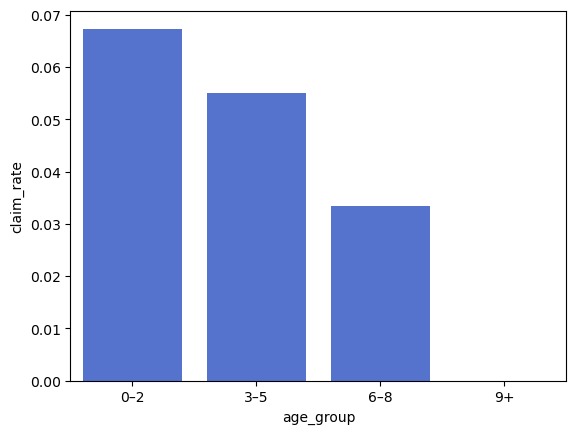

In [19]:
sns.barplot(
    data=age_group_rate,
    x="age_group",
    y="claim_rate",
    color="royalblue"
)


A clear decrease in the claim rate is observed as the vehicle gets older.

Vehicles aged 0–2 years have the highest claim rate (~6.7%), while those older than 6 years show almost no claims.

This suggests that:

Newer cars tend to have more claims, probably because owners of new vehicles usually have comprehensive insurance coverage and are more willing to file claims.

As vehicles age, owners may switch to basic insurance plans or choose not to claim minor damages.

 *Conclusion: there is a strong negative relationship between vehicle age and claim rate.

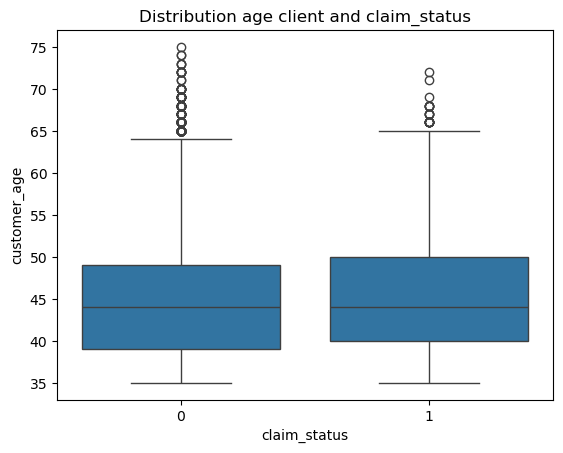

In [20]:
sns.boxplot(x="claim_status", y="customer_age", data=df)
plt.title("Distribution age client and claim_status")
plt.show()

The boxplot shows that the age distributions of customers with and without claims are quite similar.
However, the group with claims tends to be slightly older (the median age is a bit higher).

This aligns with the previous analysis, where customers over 55 years old showed higher claim rates.

* Conclusion: customer age has a mild effect — older customers tend to claim more often, but the difference is not very pronounced.

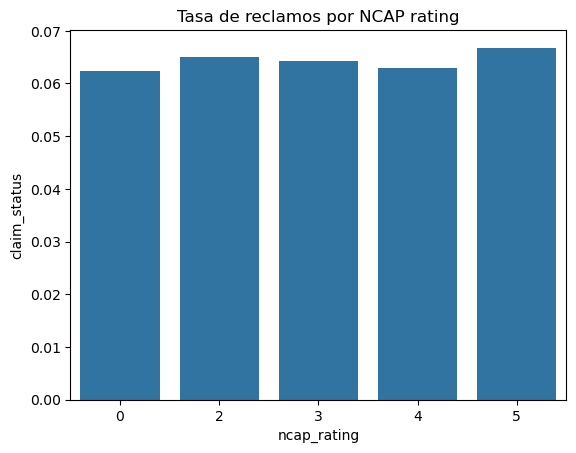

In [21]:
claim_by_ncap = df.groupby("ncap_rating")["claim_status"].mean().reset_index()
sns.barplot(x="ncap_rating", y="claim_status", data=claim_by_ncap)
plt.title("% claims by NCAP rating")
plt.show()

The claim rates are very similar across all NCAP values (0 to 5).

No clear trend is observed (neither increasing nor decreasing).

* Conclusion: the NCAP safety rating is not significantly associated with claim frequency.
This could be because NCAP measures the vehicle’s passive safety, not the risk of an accident or the driver’s tendency to file a claim.

In [38]:
df["customer_age"].skew()

np.float64(0.659786079416432)

In [40]:
round(float(df["customer_age"].skew()), 2)

0.66

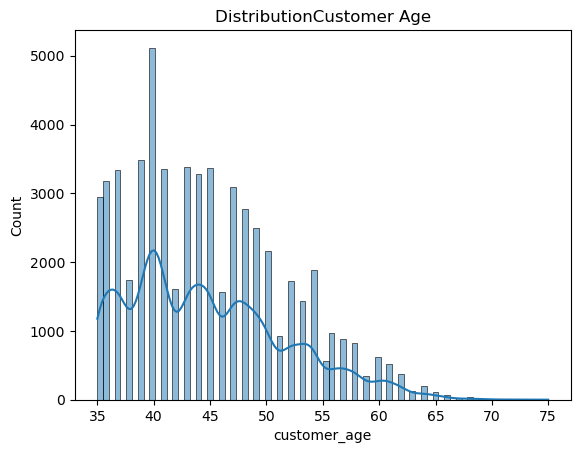

In [41]:

sns.histplot(df["customer_age"], kde=True)
plt.title("DistributionCustomer Age")
plt.show()

## Do certain vehicle models have higher claim rates?
 → Rank models by average claim rate; highlight top risky models.

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [23]:
#### how many vehicles have claims 
df['claim_status'].value_counts(normalize=True) * 100



claim_status
0    93.603222
1     6.396778
Name: proportion, dtype: float64

In [24]:
claim_rate_by_model = (
    df.groupby('model')['claim_status']
    .mean()
    .sort_values(ascending=False)
)

claim_rate_by_model

model
M2     0.074074
M5     0.072591
M7     0.068367
M6     0.068162
M4     0.064275
M9     0.062914
M1     0.061413
M10    0.060380
M8     0.058471
M3     0.053940
M11    0.041322
Name: claim_status, dtype: float64

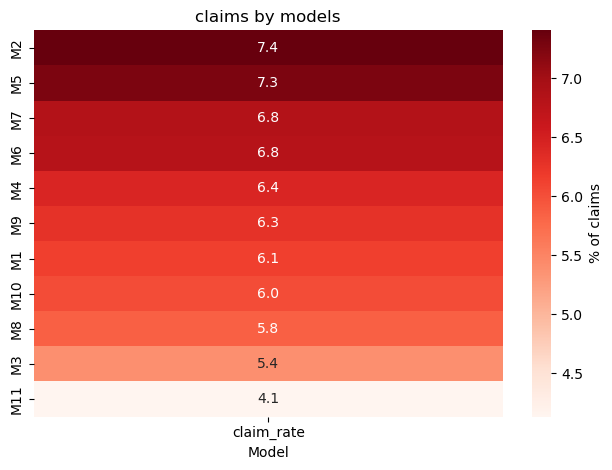

In [33]:
import pandas as pd

# Convertir la serie a DataFrame 2D
df_heat = claim_rate_by_model.to_frame('claim_rate') * 100

sns.heatmap(
    df_heat,
    cmap='Reds',
    annot=True,
    fmt=".1f",
    cbar_kws={'label': '% of claims'}
)
plt.title('claims by models')
plt.xlabel('Model')
plt.ylabel('')
plt.tight_layout()
plt.show()

#### In summary:
Claim rates vary noticeably across vehicle models. Models M2 and M5 show the highest claim frequencies, while M11 and M3 have the lowest.
This indicates that vehicle model is an important factor influencing claim likelihood, potentially linked to driver profile, vehicle usage, or repair cost differences.

## Are vehicles with more safety features (airbags, ESC, TPMS, parking sensors, cameras) less likely to file claims?
 → Create a “safety score”; compare average claim rate across safety levels.

In [26]:
safety_features = ['airbags', 'is_esc', 'is_tpms', 'is_parking_sensors', 'is_parking_camera']
for col in safety_features[1:]:  # excepto 'airbags', que ya es numérica
    df[col] = df[col].map({'Yes': 1, 'No': 0})
safety_features

['airbags', 'is_esc', 'is_tpms', 'is_parking_sensors', 'is_parking_camera']

In [27]:
df['safety_score'] = df[safety_features].sum(axis=1)
df['safety_score']

0        10
1         4
2        10
3         3
4         3
         ..
58587     3
58588    10
58589     3
58590     3
58591     3
Name: safety_score, Length: 58592, dtype: int64

In [28]:
claim_rate_by_safety = (
    df.groupby('safety_score')['claim_status']
    .mean()
    .reset_index()
)
claim_rate_by_safety

,safety_score,claim_status
0,2,0.060380
1,3,0.063605
2,4,0.062914
3,5,0.065835
4,9,0.068367
5,10,0.064275


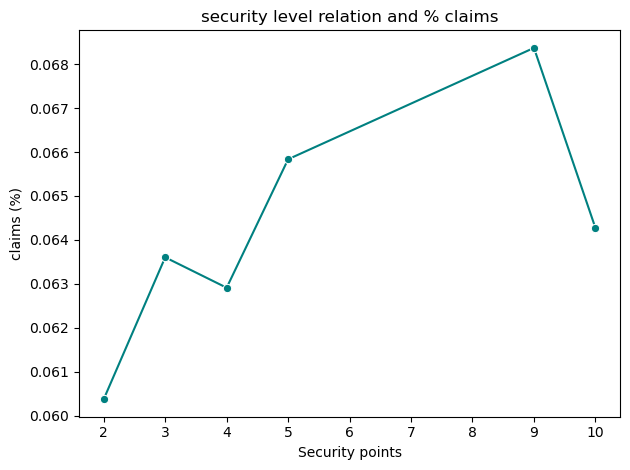

In [29]:
sns.lineplot(
    x='safety_score',
    y='claim_status',
    data=claim_rate_by_safety,
    marker='o',
    color='teal'
)
plt.title('security level relation and % claims')
plt.xlabel('Security points')
plt.ylabel('claims (%)')
plt.tight_layout()
plt.show()

### summary:
There is no strong or consistent relationship between security level and claim frequency.
Security points alone do not explain the differences in claim behavior — other factors such as vehicle value, driver profile, and insurance type are likely influencing the results.

## How do different fuel types affect claim likelihood?
 → Compare claim rate by fuel type (gasoline, diesel, hybrid, electric).

In [30]:
# Average claim rate by fuel type
claim_rate_by_fuel = (
    df.groupby('fuel_type')['claim_status']
    .mean()
    .reset_index()
    .sort_values('claim_status', ascending=False)
)
claim_rate_by_fuel

,fuel_type,claim_status
2,Petrol,0.066384
1,Diesel,0.064862
0,CNG,0.060748


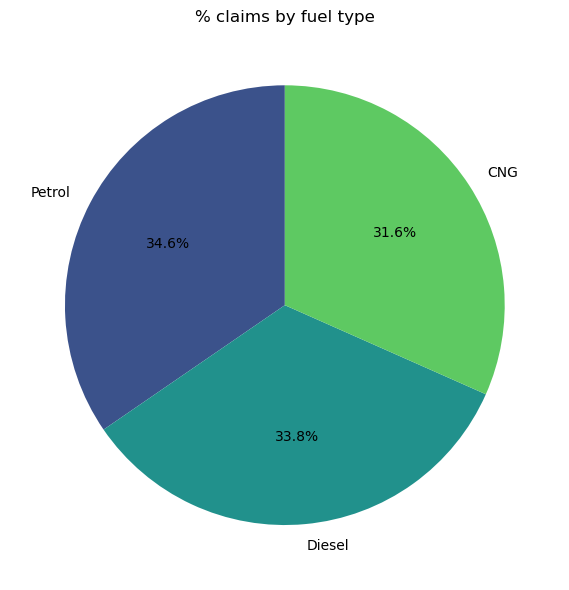

In [31]:
plt.figure(figsize=(6, 6))
plt.pie(
    claim_rate_by_fuel['claim_status'],
    labels=claim_rate_by_fuel['fuel_type'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis', len(claim_rate_by_fuel))
)
plt.title('% claims by fuel type')
plt.tight_layout()
plt.show()

### Interpretation

Petrol vehicles represent the highest share of claims at 34.6%.

Diesel vehicles are very close behind with 33.8%.

CNG vehicles have the lowest share, at 31.6%.

Las diferencias entre los tres tipos de combustible son relativamente pequeñas (≈3 puntos porcentuales), por lo que no hay una brecha marcada.

Conclusion

The fuel type has only a minor influence on claim frequency.

Petrol vehicles show a slightly higher proportion of claims, which could be due to:

Their higher market share or more frequent daily use, especially in urban settings.

A different driver profile (e.g., younger or more frequent drivers).

CNG vehicles have the lowest claim rate, possibly because they are often used in fleet or commercial settings, where drivers may be more cautious or repairs are managed differently.